In [14]:
%display latex

In [15]:
from sage.combinat.q_analogues import *
from sage.combinat.sf.sfa import *
from itertools import product

In [16]:
Sym = SymmetricFunctions(QQ)
Sym.inject_shorthands()

Defining e as shorthand for Symmetric Functions over Rational Field in the elementary basis
Defining f as shorthand for Symmetric Functions over Rational Field in the forgotten basis
Defining h as shorthand for Symmetric Functions over Rational Field in the homogeneous basis
Defining m as shorthand for Symmetric Functions over Rational Field in the monomial basis
Defining p as shorthand for Symmetric Functions over Rational Field in the powersum basis
Defining s as shorthand for Symmetric Functions over Rational Field in the Schur basis


In [4]:
Qqt=QQ['q','t']
Rqt=FractionField(Qqt)
Sym = SymmetricFunctions(Rqt)
S = SymmetricFunctions(QQ)
Sym.inject_shorthands(verbose=False)
H = Sym.macdonald().Ht()
t=H.t
q=H.q

s.set_print_style('length')
e.set_print_style('length')
H.set_print_style('length')

One=s([])
X=tensor([s[1],s[0]])
Y=tensor([s[0],s[1]])
M=(1-q)*(1-t)
def mystr(i): 
    if i<10: 
        return str(i) 
    else: 
        return ''.join([str(i),"."])

In [5]:
def InSchur(F):
    try:
        return s(Sym(S.from_polynomial(Rqt(F).numerator()))).restrict_partition_lengths(2,exact=false)
    except:
        return F

In [6]:
# Construction récursive des vecteurs (alpha,delta,beta)
def f(L,v,i,n,a,b,k):
    if n==a-2:
        v[k]+=1
        L.append(v)
    else:
        r=copy(v)
        r[i]+=1
        f(L,r,i,n+1,a,b,k)
        if i<2*k:
            f(L,v,i+1,n,a,b,k)

# Construction des vecteurs (alpha,delta,beta) pour k fixé
def vectors(a,b,k):
    M=[]
    v=[0]*(2*k+1)
    f(M,v,0,0,a,b,k)
    return M

In [7]:
# Polynôme associé à un vecteur (alpha,delta,beta) fixé
def monomials(M,b,s):
    i=M[s]
    r=1
    k=len(i)//2
    for j in range(k):
        if i[j]!=0:
            r=r*(q^(b-j)*t^j)^i[j]
        if i[2*k-j] !=0 :
            r=r*(t^(b-j)*q^j)^i[2*k-j]
    r=r*(q*t)^(k*(i[k]+1))*h([(b-2*k)*(i[k]+1)]).expand(2,alphabet='q,t')
    return r

# Somme des polynômes associés aux vecteurs (alpha,delta,beta) pour k fixé
def polynomials(M,b):
    P=0
    for s in range(len(M)):
        P=P+monomials(M,b,s)
    return P

# h_a[h_b(q,t)]
def multinomials(a,b):
    P=0
    for k in range(b//2+1):
        P=P+polynomials(vectors(a,b,k),b)
    return P

In [12]:
InSchur(multinomials(5,6))

s[30] + s[28, 2] + s[27, 3] + 2*s[26, 4] + 2*s[25, 5] + 3*s[24, 6] + 2*s[23, 7] + 4*s[22, 8] + 3*s[21, 9] + 4*s[20, 10] + 2*s[19, 11] + 4*s[18, 12] + s[17, 13] + 2*s[16, 14]

In [10]:
a=5
b=6
k=b//2
InSchur(polynomials(vectors(a,b,3),b))


s[24, 6] + s[22, 8] + s[21, 9] + s[20, 10] + s[19, 11] + 2*s[18, 12] + s[16, 14]

In [25]:
InSchur(polynomials(vectors(a,b,1),b))

s[28, 2] + s[27, 3] + s[26, 4] + s[25, 5] + s[22, 8] + s[21, 9] + s[20, 10] - s[19, 11] + s[16, 14] + s[15, 15]

In [65]:
InSchur(polynomials(vectors(a,b,2),b))

s[26, 4] + s[25, 5] + 2*s[24, 6] + 2*s[23, 7] + 2*s[22, 8] + s[21, 9] + 2*s[20, 10] + 2*s[19, 11] + 2*s[18, 12] + s[17, 13] - s[15, 15]

In [66]:
M = vectors(a,b,1)
for s in range(len(M)):
    print(monomials(vectors(a,b,1),b,s), M[s])

(q^28*t^2 + q^27*t^3 + q^26*t^4 + q^25*t^5 + q^24*t^6 + q^23*t^7 + q^22*t^8 + q^21*t^9 + q^20*t^10) [3, 1, 0]
(q^27*t^3 + q^26*t^4 + q^25*t^5 + q^24*t^6 + q^23*t^7 + q^22*t^8 + q^21*t^9 + q^20*t^10 + q^19*t^11 + q^18*t^12 + q^17*t^13 + q^16*t^14 + q^15*t^15) [2, 2, 0]
(q^22*t^8 + q^21*t^9 + q^20*t^10 + q^19*t^11 + q^18*t^12 + q^17*t^13 + q^16*t^14 + q^15*t^15 + q^14*t^16) [2, 1, 1]
(q^26*t^4 + q^25*t^5 + q^24*t^6 + q^23*t^7 + q^22*t^8 + q^21*t^9 + q^20*t^10 + q^19*t^11 + q^18*t^12 + q^17*t^13 + q^16*t^14 + q^15*t^15 + q^14*t^16 + q^13*t^17 + q^12*t^18 + q^11*t^19 + q^10*t^20) [1, 3, 0]
(q^21*t^9 + q^20*t^10 + q^19*t^11 + q^18*t^12 + q^17*t^13 + q^16*t^14 + q^15*t^15 + q^14*t^16 + q^13*t^17 + q^12*t^18 + q^11*t^19 + q^10*t^20 + q^9*t^21) [1, 2, 1]
(q^16*t^14 + q^15*t^15 + q^14*t^16 + q^13*t^17 + q^12*t^18 + q^11*t^19 + q^10*t^20 + q^9*t^21 + q^8*t^22) [1, 1, 2]
(q^25*t^5 + q^24*t^6 + q^23*t^7 + q^22*t^8 + q^21*t^9 + q^20*t^10 + q^19*t^11 + q^18*t^12 + q^17*t^13 + q^16*t^14 + q^15*t^15 +

In [67]:
M = vectors(a,b,1)
P1=0
for v in M:
    k = len(v)//2
    if v[k] == 2:
        P1= P1+ monomials([v],b,0)


In [68]:
M = vectors(a,b,2)
P2=0
for v in M:
    k = len(v)//2
    if v[k] == 2:
        P2= P2+ monomials([v],b,0)

In [73]:
InSchur(P1+P2)

s[27, 3] + s[24, 6] + s[23, 7] + s[22, 8] + s[21, 9] + s[19, 11] + 2*s[18, 12] - s[16, 14]

In [63]:
InSchur(P1)

s[28, 2] + s[22, 8] - s[19, 11] + s[16, 14]

In [64]:
InSchur(P2)

s[26, 4] + s[25, 5] + s[24, 6] + s[23, 7] + s[20, 10] + s[19, 11]

In [102]:
M = vectors(a,b,3)
P3=0
for v in M:
    k = len(v)//2
    if v[k] == 2:
        P3= P3+ monomials([v],b,0)

In [103]:
InSchur(P1+P2+P3)

s[27, 3] + 3*s[21, 9] + 2*s[19, 11] - 2*s[18, 12] + 2*s[17, 13] + 3*s[15, 15]

In [98]:
P3

(q^21*t^9 + q^20*t^10 + 2*q^19*t^11 + q^18*t^12 + 2*q^17*t^13 + 2*q^16*t^14 + 3*q^15*t^15 + 2*q^14*t^16 + 2*q^13*t^17 + q^12*t^18 + 2*q^11*t^19 + q^10*t^20 + q^9*t^21)

In [96]:
M = vectors(a,b,3)
for v in M:
    k = len(v)//2
    if v[k] == 2:
        print(monomials([v],b,0))

(q^21*t^9)
(q^20*t^10)
(q^19*t^11)
(q^17*t^13)
(q^16*t^14)
(q^15*t^15)
(q^19*t^11)
(q^18*t^12)
(q^16*t^14)
(q^15*t^15)
(q^14*t^16)
(q^17*t^13)
(q^15*t^15)
(q^14*t^16)
(q^13*t^17)
(q^13*t^17)
(q^12*t^18)
(q^11*t^19)
(q^11*t^19)
(q^10*t^20)
(q^9*t^21)


In [105]:
# Vecteur obtenu par sommation des premières coordonnées
def derive(x):
    t=[]
    r=0
    for i in range(len(x)):
        r=r+x[i]
        t=t+[r]
    return t

# Relation de dominance
def cover(x,y):
    r=derive(x)
    s=derive(y)
    for i in range(len(x)):
        if r[i]>s[i]:
            return False
    return True

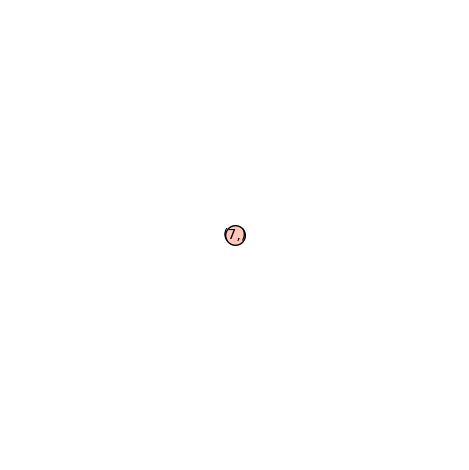

In [12]:
W=vectors(8,3,0)
elements=tuple(tuple(i) for i in W)
Poset((elements,cover)).plot()

In [106]:
W0=vectors(a,b,1)
elements0=tuple(tuple(i) for i in W0)
P0=Poset((elements0,cover))

In [108]:
W1=vectors(a,b,2)
elements1=tuple(tuple(i) for i in W1)
P1=Poset((elements1,cover))

In [109]:
W2=vectors(a,b,3)
elements2=tuple(tuple(i) for i in W2)
P2=Poset((elements2,cover))

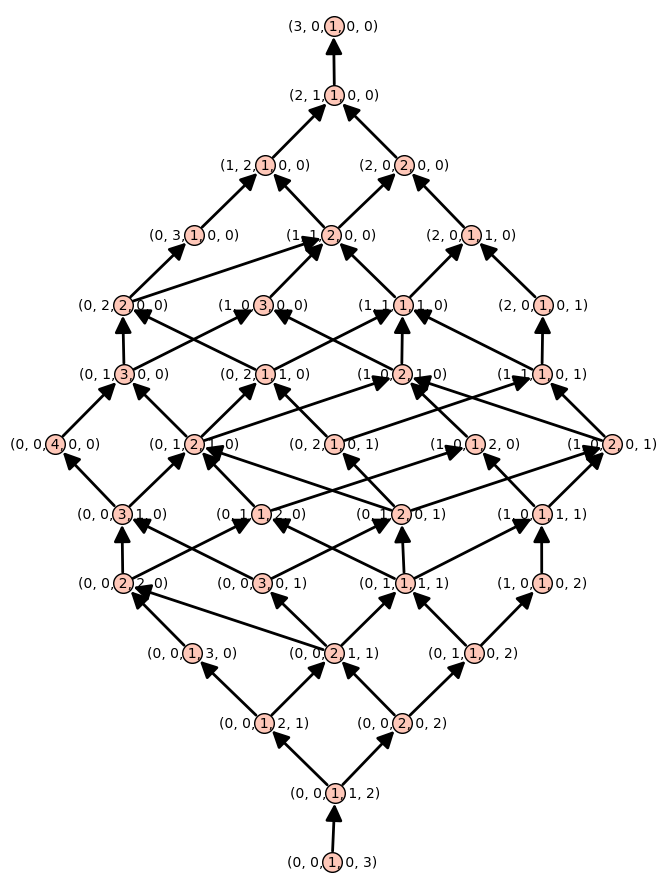

In [110]:

P1.plot(figsize=12)

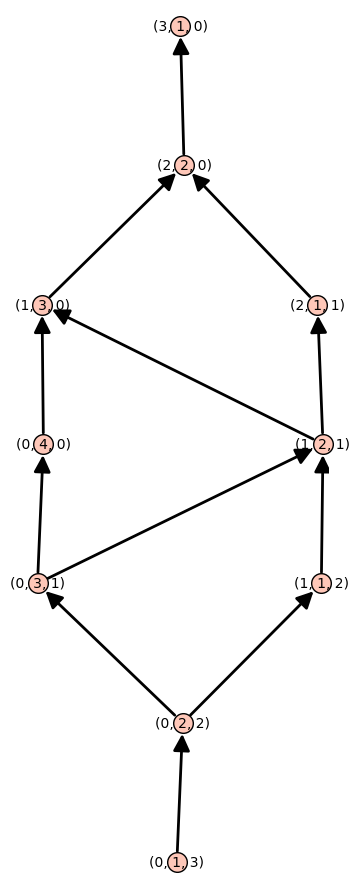

In [111]:

P0.plot(figsize=12)

In [123]:
p = WeakReversePlanePartition([[0, 1, 3], [2, 4, 4], [3]])

In [124]:
T= p.hillman_grassl_inverse()

In [47]:
(e[2,2]-e[3,1] +e[4]).expand(8)

x0^2*x1^2 + x0^2*x1*x2 + x0*x1^2*x2 + x0^2*x2^2 + x0*x1*x2^2 + x1^2*x2^2 + x0^2*x1*x3 + x0*x1^2*x3 + x0^2*x2*x3 + 3*x0*x1*x2*x3 + x1^2*x2*x3 + x0*x2^2*x3 + x1*x2^2*x3 + x0^2*x3^2 + x0*x1*x3^2 + x1^2*x3^2 + x0*x2*x3^2 + x1*x2*x3^2 + x2^2*x3^2 + x0^2*x1*x4 + x0*x1^2*x4 + x0^2*x2*x4 + 3*x0*x1*x2*x4 + x1^2*x2*x4 + x0*x2^2*x4 + x1*x2^2*x4 + x0^2*x3*x4 + 3*x0*x1*x3*x4 + x1^2*x3*x4 + 3*x0*x2*x3*x4 + 3*x1*x2*x3*x4 + x2^2*x3*x4 + x0*x3^2*x4 + x1*x3^2*x4 + x2*x3^2*x4 + x0^2*x4^2 + x0*x1*x4^2 + x1^2*x4^2 + x0*x2*x4^2 + x1*x2*x4^2 + x2^2*x4^2 + x0*x3*x4^2 + x1*x3*x4^2 + x2*x3*x4^2 + x3^2*x4^2 + x0^2*x1*x5 + x0*x1^2*x5 + x0^2*x2*x5 + 3*x0*x1*x2*x5 + x1^2*x2*x5 + x0*x2^2*x5 + x1*x2^2*x5 + x0^2*x3*x5 + 3*x0*x1*x3*x5 + x1^2*x3*x5 + 3*x0*x2*x3*x5 + 3*x1*x2*x3*x5 + x2^2*x3*x5 + x0*x3^2*x5 + x1*x3^2*x5 + x2*x3^2*x5 + x0^2*x4*x5 + 3*x0*x1*x4*x5 + x1^2*x4*x5 + 3*x0*x2*x4*x5 + 3*x1*x2*x4*x5 + x2^2*x4*x5 + 3*x0*x3*x4*x5 + 3*x1*x3*x4*x5 + 3*x2*x3*x4*x5 + x3^2*x4*x5 + x0*x4^2*x5 + x1*x4^2*x5 + x2*x4^2*x5 + x3*x4^2*x5 + x0^2*x5^2 + x0*x1*x5^2 + x1^2*x5^2 + x0*x2*x5^2 + x1*x2*x5^2 + x2^2*x5^2 + x0*x3*x5^2 + x1*x3*x5^2 + x2*x3*x5^2 + x3^2*x5^2 + x0*x4*x5^2 + x1*x4*x5^2 + x2*x4*x5^2 + x3*x4*x5^2 + x4^2*x5^2 + x0^2*x1*x6 + x0*x1^2*x6 + x0^2*x2*x6 + 3*x0*x1*x2*x6 + x1^2*x2*x6 + x0*x2^2*x6 + x1*x2^2*x6 + x0^2*x3*x6 + 3*x0*x1*x3*x6 + x1^2*x3*x6 + 3*x0*x2*x3*x6 + 3*x1*x2*x3*x6 + x2^2*x3*x6 + x0*x3^2*x6 + x1*x3^2*x6 + x2*x3^2*x6 + x0^2*x4*x6 + 3*x0*x1*x4*x6 + x1^2*x4*x6 + 3*x0*x2*x4*x6 + 3*x1*x2*x4*x6 + x2^2*x4*x6 + 3*x0*x3*x4*x6 + 3*x1*x3*x4*x6 + 3*x2*x3*x4*x6 + x3^2*x4*x6 + x0*x4^2*x6 + x1*x4^2*x6 + x2*x4^2*x6 + x3*x4^2*x6 + x0^2*x5*x6 + 3*x0*x1*x5*x6 + x1^2*x5*x6 + 3*x0*x2*x5*x6 + 3*x1*x2*x5*x6 + x2^2*x5*x6 + 3*x0*x3*x5*x6 + 3*x1*x3*x5*x6 + 3*x2*x3*x5*x6 + x3^2*x5*x6 + 3*x0*x4*x5*x6 + 3*x1*x4*x5*x6 + 3*x2*x4*x5*x6 + 3*x3*x4*x5*x6 + x4^2*x5*x6 + x0*x5^2*x6 + x1*x5^2*x6 + x2*x5^2*x6 + x3*x5^2*x6 + x4*x5^2*x6 + x0^2*x6^2 + x0*x1*x6^2 + x1^2*x6^2 + x0*x2*x6^2 + x1*x2*x6^2 + x2^2*x6^2 + x0*x3*x6^2 + x1*x3*x6^2 + x2*x3*x6^2 + x3^2*x6^2 + x0*x4*x6^2 + x1*x4*x6^2 + x2*x4*x6^2 + x3*x4*x6^2 + x4^2*x6^2 + x0*x5*x6^2 + x1*x5*x6^2 + x2*x5*x6^2 + x3*x5*x6^2 + x4*x5*x6^2 + x5^2*x6^2 + x0^2*x1*x7 + x0*x1^2*x7 + x0^2*x2*x7 + 3*x0*x1*x2*x7 + x1^2*x2*x7 + x0*x2^2*x7 + x1*x2^2*x7 + x0^2*x3*x7 + 3*x0*x1*x3*x7 + x1^2*x3*x7 + 3*x0*x2*x3*x7 + 3*x1*x2*x3*x7 + x2^2*x3*x7 + x0*x3^2*x7 + x1*x3^2*x7 + x2*x3^2*x7 + x0^2*x4*x7 + 3*x0*x1*x4*x7 + x1^2*x4*x7 + 3*x0*x2*x4*x7 + 3*x1*x2*x4*x7 + x2^2*x4*x7 + 3*x0*x3*x4*x7 + 3*x1*x3*x4*x7 + 3*x2*x3*x4*x7 + x3^2*x4*x7 + x0*x4^2*x7 + x1*x4^2*x7 + x2*x4^2*x7 + x3*x4^2*x7 + x0^2*x5*x7 + 3*x0*x1*x5*x7 + x1^2*x5*x7 + 3*x0*x2*x5*x7 + 3*x1*x2*x5*x7 + x2^2*x5*x7 + 3*x0*x3*x5*x7 + 3*x1*x3*x5*x7 + 3*x2*x3*x5*x7 + x3^2*x5*x7 + 3*x0*x4*x5*x7 + 3*x1*x4*x5*x7 + 3*x2*x4*x5*x7 + 3*x3*x4*x5*x7 + x4^2*x5*x7 + x0*x5^2*x7 + x1*x5^2*x7 + x2*x5^2*x7 + x3*x5^2*x7 + x4*x5^2*x7 + x0^2*x6*x7 + 3*x0*x1*x6*x7 + x1^2*x6*x7 + 3*x0*x2*x6*x7 + 3*x1*x2*x6*x7 + x2^2*x6*x7 + 3*x0*x3*x6*x7 + 3*x1*x3*x6*x7 + 3*x2*x3*x6*x7 + x3^2*x6*x7 + 3*x0*x4*x6*x7 + 3*x1*x4*x6*x7 + 3*x2*x4*x6*x7 + 3*x3*x4*x6*x7 + x4^2*x6*x7 + 3*x0*x5*x6*x7 + 3*x1*x5*x6*x7 + 3*x2*x5*x6*x7 + 3*x3*x5*x6*x7 + 3*x4*x5*x6*x7 + x5^2*x6*x7 + x0*x6^2*x7 + x1*x6^2*x7 + x2*x6^2*x7 + x3*x6^2*x7 + x4*x6^2*x7 + x5*x6^2*x7 + x0^2*x7^2 + x0*x1*x7^2 + x1^2*x7^2 + x0*x2*x7^2 + x1*x2*x7^2 + x2^2*x7^2 + x0*x3*x7^2 + x1*x3*x7^2 + x2*x3*x7^2 + x3^2*x7^2 + x0*x4*x7^2 + x1*x4*x7^2 + x2*x4*x7^2 + x3*x4*x7^2 + x4^2*x7^2 + x0*x5*x7^2 + x1*x5*x7^2 + x2*x5*x7^2 + x3*x5*x7^2 + x4*x5*x7^2 + x5^2*x7^2 + x0*x6*x7^2 + x1*x6*x7^2 + x2*x6*x7^2 + x3*x6*x7^2 + x4*x6*x7^2 + x5*x6*x7^2 + x6^2*x7^2

In [42]:
(e[4,3]-2*e[5,2]+e[6,1]).expand(8)

x0^2*x1^2*x2^2*x3 + x0^2*x1^2*x2*x3^2 + x0^2*x1*x2^2*x3^2 + x0*x1^2*x2^2*x3^2 + x0^2*x1^2*x2^2*x4 + x0^2*x1^2*x2*x3*x4 + x0^2*x1*x2^2*x3*x4 + x0*x1^2*x2^2*x3*x4 + x0^2*x1^2*x3^2*x4 + x0^2*x1*x2*x3^2*x4 + x0*x1^2*x2*x3^2*x4 + x0^2*x2^2*x3^2*x4 + x0*x1*x2^2*x3^2*x4 + x1^2*x2^2*x3^2*x4 + x0^2*x1^2*x2*x4^2 + x0^2*x1*x2^2*x4^2 + x0*x1^2*x2^2*x4^2 + x0^2*x1^2*x3*x4^2 + x0^2*x1*x2*x3*x4^2 + x0*x1^2*x2*x3*x4^2 + x0^2*x2^2*x3*x4^2 + x0*x1*x2^2*x3*x4^2 + x1^2*x2^2*x3*x4^2 + x0^2*x1*x3^2*x4^2 + x0*x1^2*x3^2*x4^2 + x0^2*x2*x3^2*x4^2 + x0*x1*x2*x3^2*x4^2 + x1^2*x2*x3^2*x4^2 + x0*x2^2*x3^2*x4^2 + x1*x2^2*x3^2*x4^2 + x0^2*x1^2*x2^2*x5 + x0^2*x1^2*x2*x3*x5 + x0^2*x1*x2^2*x3*x5 + x0*x1^2*x2^2*x3*x5 + x0^2*x1^2*x3^2*x5 + x0^2*x1*x2*x3^2*x5 + x0*x1^2*x2*x3^2*x5 + x0^2*x2^2*x3^2*x5 + x0*x1*x2^2*x3^2*x5 + x1^2*x2^2*x3^2*x5 + x0^2*x1^2*x2*x4*x5 + x0^2*x1*x2^2*x4*x5 + x0*x1^2*x2^2*x4*x5 + x0^2*x1^2*x3*x4*x5 + x0^2*x1*x2*x3*x4*x5 + x0*x1^2*x2*x3*x4*x5 + x0^2*x2^2*x3*x4*x5 + x0*x1*x2^2*x3*x4*x5 + x1^2*x2^2*x3*x4*x5 + x0^2*x1*x3^2*x4*x5 + x0*x1^2*x3^2*x4*x5 + x0^2*x2*x3^2*x4*x5 + x0*x1*x2*x3^2*x4*x5 + x1^2*x2*x3^2*x4*x5 + x0*x2^2*x3^2*x4*x5 + x1*x2^2*x3^2*x4*x5 + x0^2*x1^2*x4^2*x5 + x0^2*x1*x2*x4^2*x5 + x0*x1^2*x2*x4^2*x5 + x0^2*x2^2*x4^2*x5 + x0*x1*x2^2*x4^2*x5 + x1^2*x2^2*x4^2*x5 + x0^2*x1*x3*x4^2*x5 + x0*x1^2*x3*x4^2*x5 + x0^2*x2*x3*x4^2*x5 + x0*x1*x2*x3*x4^2*x5 + x1^2*x2*x3*x4^2*x5 + x0*x2^2*x3*x4^2*x5 + x1*x2^2*x3*x4^2*x5 + x0^2*x3^2*x4^2*x5 + x0*x1*x3^2*x4^2*x5 + x1^2*x3^2*x4^2*x5 + x0*x2*x3^2*x4^2*x5 + x1*x2*x3^2*x4^2*x5 + x2^2*x3^2*x4^2*x5 + x0^2*x1^2*x2*x5^2 + x0^2*x1*x2^2*x5^2 + x0*x1^2*x2^2*x5^2 + x0^2*x1^2*x3*x5^2 + x0^2*x1*x2*x3*x5^2 + x0*x1^2*x2*x3*x5^2 + x0^2*x2^2*x3*x5^2 + x0*x1*x2^2*x3*x5^2 + x1^2*x2^2*x3*x5^2 + x0^2*x1*x3^2*x5^2 + x0*x1^2*x3^2*x5^2 + x0^2*x2*x3^2*x5^2 + x0*x1*x2*x3^2*x5^2 + x1^2*x2*x3^2*x5^2 + x0*x2^2*x3^2*x5^2 + x1*x2^2*x3^2*x5^2 + x0^2*x1^2*x4*x5^2 + x0^2*x1*x2*x4*x5^2 + x0*x1^2*x2*x4*x5^2 + x0^2*x2^2*x4*x5^2 + x0*x1*x2^2*x4*x5^2 + x1^2*x2^2*x4*x5^2 + x0^2*x1*x3*x4*x5^2 + x0*x1^2*x3*x4*x5^2 + x0^2*x2*x3*x4*x5^2 + x0*x1*x2*x3*x4*x5^2 + x1^2*x2*x3*x4*x5^2 + x0*x2^2*x3*x4*x5^2 + x1*x2^2*x3*x4*x5^2 + x0^2*x3^2*x4*x5^2 + x0*x1*x3^2*x4*x5^2 + x1^2*x3^2*x4*x5^2 + x0*x2*x3^2*x4*x5^2 + x1*x2*x3^2*x4*x5^2 + x2^2*x3^2*x4*x5^2 + x0^2*x1*x4^2*x5^2 + x0*x1^2*x4^2*x5^2 + x0^2*x2*x4^2*x5^2 + x0*x1*x2*x4^2*x5^2 + x1^2*x2*x4^2*x5^2 + x0*x2^2*x4^2*x5^2 + x1*x2^2*x4^2*x5^2 + x0^2*x3*x4^2*x5^2 + x0*x1*x3*x4^2*x5^2 + x1^2*x3*x4^2*x5^2 + x0*x2*x3*x4^2*x5^2 + x1*x2*x3*x4^2*x5^2 + x2^2*x3*x4^2*x5^2 + x0*x3^2*x4^2*x5^2 + x1*x3^2*x4^2*x5^2 + x2*x3^2*x4^2*x5^2 + x0^2*x1^2*x2^2*x6 + x0^2*x1^2*x2*x3*x6 + x0^2*x1*x2^2*x3*x6 + x0*x1^2*x2^2*x3*x6 + x0^2*x1^2*x3^2*x6 + x0^2*x1*x2*x3^2*x6 + x0*x1^2*x2*x3^2*x6 + x0^2*x2^2*x3^2*x6 + x0*x1*x2^2*x3^2*x6 + x1^2*x2^2*x3^2*x6 + x0^2*x1^2*x2*x4*x6 + x0^2*x1*x2^2*x4*x6 + x0*x1^2*x2^2*x4*x6 + x0^2*x1^2*x3*x4*x6 + x0^2*x1*x2*x3*x4*x6 + x0*x1^2*x2*x3*x4*x6 + x0^2*x2^2*x3*x4*x6 + x0*x1*x2^2*x3*x4*x6 + x1^2*x2^2*x3*x4*x6 + x0^2*x1*x3^2*x4*x6 + x0*x1^2*x3^2*x4*x6 + x0^2*x2*x3^2*x4*x6 + x0*x1*x2*x3^2*x4*x6 + x1^2*x2*x3^2*x4*x6 + x0*x2^2*x3^2*x4*x6 + x1*x2^2*x3^2*x4*x6 + x0^2*x1^2*x4^2*x6 + x0^2*x1*x2*x4^2*x6 + x0*x1^2*x2*x4^2*x6 + x0^2*x2^2*x4^2*x6 + x0*x1*x2^2*x4^2*x6 + x1^2*x2^2*x4^2*x6 + x0^2*x1*x3*x4^2*x6 + x0*x1^2*x3*x4^2*x6 + x0^2*x2*x3*x4^2*x6 + x0*x1*x2*x3*x4^2*x6 + x1^2*x2*x3*x4^2*x6 + x0*x2^2*x3*x4^2*x6 + x1*x2^2*x3*x4^2*x6 + x0^2*x3^2*x4^2*x6 + x0*x1*x3^2*x4^2*x6 + x1^2*x3^2*x4^2*x6 + x0*x2*x3^2*x4^2*x6 + x1*x2*x3^2*x4^2*x6 + x2^2*x3^2*x4^2*x6 + x0^2*x1^2*x2*x5*x6 + x0^2*x1*x2^2*x5*x6 + x0*x1^2*x2^2*x5*x6 + x0^2*x1^2*x3*x5*x6 + x0^2*x1*x2*x3*x5*x6 + x0*x1^2*x2*x3*x5*x6 + x0^2*x2^2*x3*x5*x6 + x0*x1*x2^2*x3*x5*x6 + x1^2*x2^2*x3*x5*x6 + x0^2*x1*x3^2*x5*x6 + x0*x1^2*x3^2*x5*x6 + x0^2*x2*x3^2*x5*x6 + x0*x1*x2*x3^2*x5*x6 + x1^2*x2*x3^2*x5*x6 + x0*x2^2*x3^2*x5*x6 + x1*x2^2*x3^2*x5*x6 + x0^2*x1^2*x4*x5*x6 + x0^2*x1*x2*x4*x5*x6 + x0*x1^2*x2*x4*x5*x6 + x0^2*x2^2*x4*x5*x6 + x0*x1*x2^2*x4*x5*x6 + x1^2*x2^2*x4*x5*x6 +